In this notebook we attempt to classify labeled images of human eyes as male or female. To do this we train a binary logistic regression model. We work with a data set of ~13,000 RBG images. The array we run the regression on has feature vectors consisting of the pixel values at a particular position and RBG layer of the image. 

We also run the regression on grayscale 2D arrays. Training and fine tuning the logistic regression model on each and computing the accuracy of the model on the test set gives a prediction accuracy of roughly 80% for the grayscale images and 85% for the RBG images. 

To Do:
1. Test on images of actual people (celebrities).
2. Try getting the elasticnet to work.
3. How to increase accuracy: do PCA to reduce number of features then apply LR.
4. Upload to GIT for version control

In [21]:
#Logistic Regression imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import PIL
import os
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

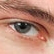

In [85]:
#examples of images
fm_directory = 'female_eyes'
m_directory = 'male_eyes'

i = 5
filename = os.listdir(m_directory)[i]
f = os.path.join(m_directory,filename)
image = PIL.Image.open(f)
image

In [88]:
#read data into list of numpy arrays and resize all the images to a common size

#list of grayscale images
fm_g_L = []
m_g_L = []

#list of full images
fm_L = []
m_L = []

m = 117

fm_directory = 'female_eyes'
m_directory = 'male_eyes'

for filename in os.listdir(fm_directory):
    f = os.path.join(fm_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image = PIL.Image.open(f)

        image = image.resize((m,m))
            
        fm_L.append(np.array(image).reshape(1,-1))
        fm_g_L.append(np.array(image.convert('L')).reshape(1,-1))
        
for filename in os.listdir(m_directory):
    f = os.path.join(m_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        
        image = image.resize((m,m))
            
        m_L.append(np.array(image).reshape(1,-1))
        m_g_L.append(np.array(image.convert('L')).reshape(1,-1))

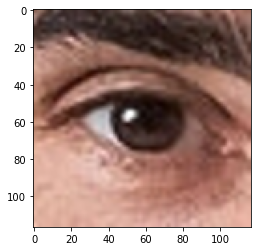

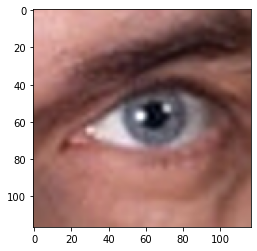

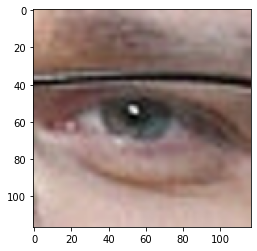

In [90]:
#examples of resized images

for i in range(3):
    a = m_L[i]
    plt.imshow(a.reshape((m,m,3)))
    plt.show()

###Logistic Regression

In [4]:
#make labels: female = 0, male  = 1

fm_N = len(fm_L)
m_N = len(m_L)

fm_lab = fm_N*[0]
m_lab = m_N*[1]

print('Female eyes: ' + str(fm_N))
print('Male eyes: ' + str(m_N))
print('Total eyes: ' + str(fm_N + m_N))

Female eyes: 5202
Male eyes: 6323
Total eyes: 11525


In [93]:
#randomize and split data into training and test sets

eyes, lab = shuffle(fm_L + m_L, fm_lab + m_lab)
#eyes_g, lab = shuffle(fm_g_L + m_g_L, fm_lab + m_lab)

prop_train = .9
N = int(prop_train*len(eyes))

train = np.array(eyes[:N]).reshape((N,3*m**2))
train_lab = np.array(lab[:N])

test = np.array(eyes[N:]).reshape((len(eyes) - N,3*m**2))
test_lab = np.array(lab[N:])

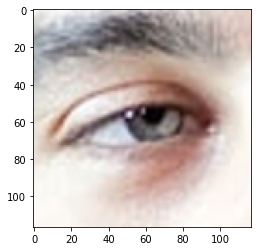

In [94]:
#Demonstates reconstruction
image = train[0,:].reshape((m,m,3))
plt.imshow(image)

In [95]:
print(np.shape(train))
print(np.shape(test))
print(np.shape(train_lab))
print(np.shape(test_lab))

(10372, 41067)
(1153, 41067)
(10372,)
(1153,)


In [58]:
#Try PCA before LR
"""
pca = PCA(n_components=500)
pca.fit(train)
train_pca = pca.fit_transform(train)
test_pca = pca.fit_transform(test)
print(np.shape(test_pca))
"""

'\npca = PCA(n_components=500)\npca.fit(train)\ntrain_pca = pca.fit_transform(train)\ntest_pca = pca.fit_transform(test)\nprint(np.shape(test_pca))\n'

In [134]:
#Train model

#data = train_pca
data = train

model = LogisticRegression(solver='saga', random_state=0, max_iter = 200, penalty = 'l1', C = .001)
model.fit(data,train_lab)

#Best: prop_train = .9, penalty = 'l1', C = .001

/Users/derekkielty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.001, max_iter=200, penalty='l1', random_state=0,
                   solver='saga')

In [135]:
#Run model on training data

print('Results of Training Data:')
print('-----------------------------')
print('Score: ' + str(model.score(data,train_lab)))
print('-----------------------------')
print('Confusion Matrix:')
print(confusion_matrix(train_lab, model.predict(data))) #false, true, negs, pos
print('-----------------------------')
print(model.predict_proba(data).round(3)[:5])
print('-----------------------------')
print('Prediction:')
model.predict(data)[:5]

Results of Training Data:
-----------------------------
Score: 0.8655996914770536
-----------------------------
Confusion Matrix:
[[3943  725]
 [ 669 5035]]
-----------------------------
[[0.026 0.974]
 [0.521 0.479]
 [0.773 0.227]
 [0.126 0.874]
 [0.007 0.993]]
-----------------------------
Prediction:


array([1, 0, 0, 1, 1])

In [136]:
#Run model on test data
#data_test = test_pca
data_test = test

print('Results of Test Data:')
print('-----------------------------')
print('Score: ' + str(model.score(data_test,test_lab)))
print('-----------------------------')
print('Confusion Matrix:')
print(confusion_matrix(test_lab, model.predict(data_test))) #false, true, negs, pos
print('-----------------------------')
print(model.predict_proba(data_test).round(3)[:5])
print('-----------------------------')
print('Prediction:')
model.predict(data_test)[:5]

Results of Test Data:
-----------------------------
Score: 0.8508239375542064
-----------------------------
Confusion Matrix:
[[443  91]
 [ 81 538]]
-----------------------------
[[0.324 0.676]
 [0.889 0.111]
 [0.966 0.034]
 [0.744 0.256]
 [0.104 0.896]]
-----------------------------
Prediction:


array([1, 0, 0, 0, 1])

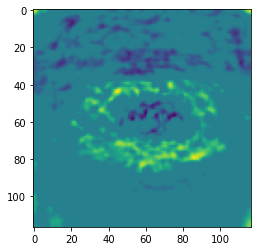

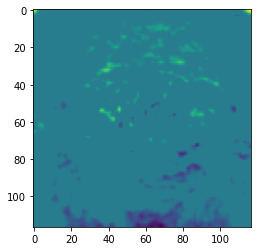

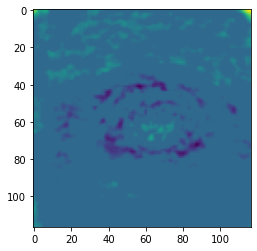

In [137]:
#plots of 3 layer of weight corresponding to male eye

plt.imshow(model.coef_[0].reshape((m,m,3))[:,:,0])
plt.show()
plt.imshow(model.coef_[0].reshape((m,m,3))[:,:,1])
plt.show()
plt.imshow(model.coef_[0].reshape((m,m,3))[:,:,2])
plt.show()

Eye: male; Predicted: male.


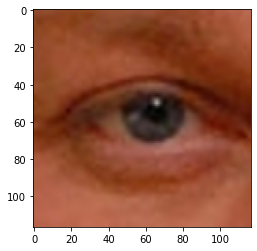

Eye: female; Predicted: female.


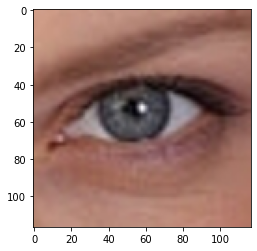

Eye: female; Predicted: female.


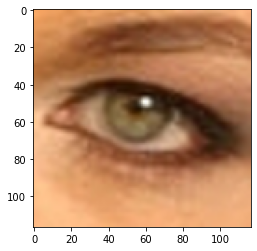

Eye: female; Predicted: female.


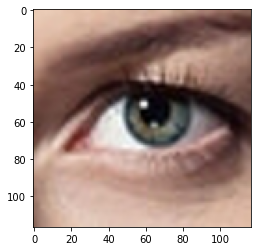

Eye: male; Predicted: male.


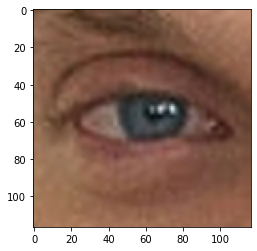

Eye: male; Predicted: male.


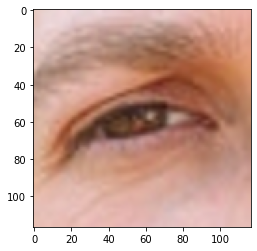

Eye: male; Predicted: male.


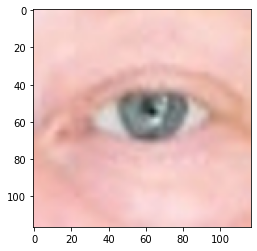

Eye: male; Predicted: male.


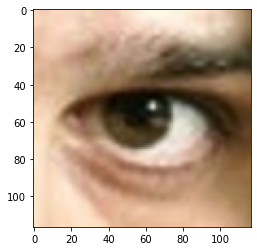

Eye: male; Predicted: male.


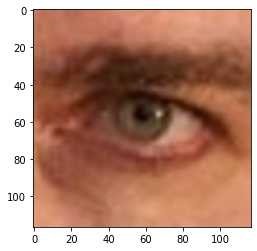

Eye: male; Predicted: female.


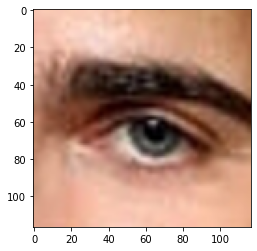

In [115]:
for i in range(10):
    if int(model.predict(test)[i]) == 0:
        pred_gen = 'female'
    else:
        pred_gen = 'male'
        
    if int(test_lab[i]) == 0:
        gen = 'female'
    elif int(test_lab[i]) == 1:
        gen = 'male'
        
    print('Eye: ' + gen + '; Predicted: ' + pred_gen + '.')
    a = test[i,:]
    plt.imshow(a.reshape((m,m,3)))
    plt.show()

In [ ]:
#manually isolate celebs eyes and run model on them to see how we do
#isolate eyes and resize
#turn everything into numpy arrays